<a href="https://colab.research.google.com/github/PatrickDurkin/APRD-Homeworks/blob/master/Seagate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre-processing part 1

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
csvfile = '/content/drive/My Drive/Colab Notebooks/Seagate Project/SeagateCleanedData.csv'
df = pd.read_csv(csvfile, encoding='latin1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,Unnamed: 0,drive_serial_num,event_date,motor_serial_num,drive_interface,drive_part_number,drive_product_group,motor_vend_id,motor_lot,run_type,stack_serial_number,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm3_parameter7,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm_mfg_date_code,mtrprm_motor_line_num,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm_ramp_date_code,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,mtrprm_ship_date,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18,Target
0,1,ZL2115PA,2019-09-17 05:51:49,17BHYZ41001,SATA,2KH113-268,2KH113,Z,100847723ZC54100K1U,NBP,DCHZCNFXD,0.023000,14.90,1.697,0.000,131,0.000,S2490724180557Ã£â¬â¬Ã£â¬â¬Ã£,1.692,0.8110,13.068,0.468,0.8377,0.01740,0.8532,0.0,7.6362,6.2704,0.0,14.7411,0.001,4100.0,1.0,195.450,6.2307,6.2288,8.94800,K,0.0,2.02200,2.01900,2.02100,20190903.0,0.02364,6.147,0.007830,0.075950,0.097700,0.166990,0.188700,0.257720,0.279450,0.348620,0.370320,0.439970,0.461800,0.531040,0.552730,0.62181,0.643560,0.713150,0.73486,0.803080,0
1,2,ZL213BRM,2019-09-22 06:40:01,18GMDZ31101,SATA,2KH113-268,2KH113,Z,100847723ZC53110K1U,NB,DCJBC0N6K,0.008000,14.60,1.137,0.000,101,0.000,S4790701195523Ã£â¬â¬Ã£â¬â¬Ã£,2.047,0.8730,13.042,0.389,0.8274,0.01420,0.8330,0.0,7.5475,9.7755,0.0,7.3152,0.001,3110.0,1.0,232.350,6.2967,6.2622,8.98500,K,0.0,2.01900,2.02000,2.02200,20190910.0,0.02371,6.324,0.008287,0.077201,0.098241,0.167931,0.189343,0.259414,0.280663,0.350063,0.371181,0.441205,0.462637,0.531803,0.552848,0.62245,0.643631,0.713801,0.73503,0.804248,0
2,3,ZL20RHVC,2019-08-30 00:44:39,12FR8Z50701,SATA,2KH103-999,2KH103,Z,100847723ZC55070K1U,NB,DCGRCCKSS,0.008000,14.80,1.309,0.000,1.91e+11,0.000,4790.720061513,1.826,0.7000,13.153,0.440,0.8354,0.01000,0.8516,0.0,7.3480,5.0609,0.0,2.5454,0.001,5070.0,1.0,213.710,NaN,NaN,8.88000,K,0.0,2.02800,2.02700,2.03400,20190814.0,0.02355,6.124,0.008660,0.077080,0.098680,0.168070,0.189610,0.259450,0.280950,0.349660,0.371490,0.440520,0.462320,0.532220,0.553760,0.62286,0.644570,0.714110,0.73549,0.804110,0
3,4,ZL23PMBG,2020-01-17 07:32:39,1H8FBP32303,SAS,2RK202-130,2RK202,P,100847724PCD3230H3U,NBP,DCMFC2TXB,0.010376,15.24,2.503,-9.531,31,8.418,9.43119E+14,1.748,0.6147,13.162,NaN,0.8618,0.00328,0.8620,NaN,6.9900,NaN,NaN,1.0800,0.000,3230.0,3.0,194.079,8.3900,8.4000,9.00755,NaN,NaN,2.11500,2.13707,2.11682,NaN,0.02353,6.011,0.007570,0.075980,0.097620,0.167060,0.188700,0.258250,0.279960,0.348870,0.370580,0.440390,0.461920,0.531030,0.552620,0.62194,0.643640,0.712970,0.73452,0.802960,0
4,5,ZL210G0B,2019-09-14 19:46:12,0GEY4M40801,SATA,2KH113-268,2KH113,M,100847724MCD4080K1U,NBP,DCHXCKCE6,0.013672,13.79,2.079,-9.533,10,8.409,9.8119E+14,1.822,0.3072,13.339,NaN,0.8256,0.00363,0.8259,NaN,7.8700,NaN,NaN,8.9400,0.000,4080.0,1.0,202.190,9.4600,9.4700,9.01268,NaN,NaN,2.12859,2.15557,2.12875,NaN,0.02353,6.145,0.008270,0.076720,0.098330,0.167620,0.189030,0.258770,0.280270,0.349440,0.371230,0.440520,0.462230,0.531600,0.553070,0.62236,0.644030,0.713590,0.73533,0.804180,0


Converts the ship date into a datetime column by removing the trailing zeroes. Also, the event date column needs to be converted to a date time as well. We can also calculate the difference in days between the event date and ship date. 

Iterate through the column using list comprehension.

In [0]:
df['mtrprm_ship_date'] = df['mtrprm_ship_date'].astype(str)
df['mtrprm_ship_date'] = [s.rstrip("0") for s in df['mtrprm_ship_date']]
df['mtrprm_ship_date'] = [s.rstrip(".") for s in df['mtrprm_ship_date']]

In [0]:
from datetime import datetime,date
df['mtrprm_ship_date'] = pd.to_datetime(df['mtrprm_ship_date'],errors='coerce').dt.normalize()
df['event_date'] = pd.to_datetime(df['event_date'],errors='coerce').dt.normalize()

In [0]:
df['DateDiff'] = abs((df['event_date'] - df['mtrprm_ship_date'])).dt.days

The column mtrprm3_parameter7 has special characters in it. This is a way to remove those special characters. 

In [0]:
df['mtrprm3_parameter7'] = df['mtrprm3_parameter7'].astype(str)

In [0]:
df['mtrprm3_parameter7'] = [s.rstrip("Ã£â\x82¬â\x82¬Ã£â\x82¬â\x82¬Ã£") for s in df['mtrprm3_parameter7']]

In [0]:
len(df)

1885054

Now after looking at our dataframe the columns are a lot cleaner.

Next step is to impute the missing values with the Sci-kit learn imputer, which takes the mean in the columns and then imputes it.Im going to work with a sample of the data first to see if it works. 

In [0]:
df2 = df.sample(frac =.15)
df2

,Unnamed: 0,drive_serial_num,event_date,motor_serial_num,drive_interface,drive_part_number,drive_product_group,motor_vend_id,motor_lot,run_type,stack_serial_number,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm3_parameter7,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm_mfg_date_code,mtrprm_motor_line_num,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm_ramp_date_code,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,mtrprm_ship_date,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18,Target,DateDiff
1186070,1186071,ZL247EKX,2020-02-08,20A18P42803,SATA,2KH113-268,2KH113,P,100847724PCF4280H3U,NB,DDANC6ASY,0.024170,15.78,2.144,-9.527,35,8.403,143519122440702,1.700,0.6312,13.245,NaN,0.8544,0.02206,0.8655,NaN,8.7500,NaN,NaN,11.7700,0.000,4280.0,3.0,187.191,8.4000,8.4100,9.08349,NaN,NaN,2.11770,2.14213,2.11831,NaT,0.02373,6.042,0.00788,0.076500,0.098180,0.167670,0.189250,0.258830,0.280540,0.349380,0.371060,0.44069,0.462340,0.531420,0.553110,0.622270,0.644000,0.713360,0.734920,0.803520,0,NaN
299924,299925,ZL20NP1V,2019-08-20,1034XZ40601,SATA,2KH113-268,2KH113,Z,100847723ZC54060K1U,NBP,DCHACRKJY,0.009000,13.60,1.199,0.000,1.81e+11,0.000,4990.71807382,2.074,0.7210,13.203,0.428,0.8561,0.01820,0.8268,0.0,6.9359,16.1743,0.0,16.6239,0.001,4060.0,1.0,235.900,NaN,NaN,8.97300,K,0.0,2.01800,2.01700,2.02500,2019-08-06,0.02346,6.104,0.00829,0.076690,0.098270,0.167760,0.189550,0.258400,0.279980,0.349510,0.371090,0.44041,0.461970,0.531760,0.553410,0.622760,0.644220,0.713580,0.735120,0.803760,0,14.0
535178,535179,ZL2117BS,2019-09-20,17LR4Z51001,SATA,2KH113-268,2KH113,Z,100847723ZC55100K1U,NB,DCHSCF8HS,0.026000,13.80,0.838,0.000,191,0.000,209082301305,1.926,0.9880,14.425,0.370,0.8274,0.02730,0.8264,0.0,7.5196,11.9746,0.0,10.3389,0.001,5100.0,1.0,226.020,6.2697,6.3059,8.88600,K,0.0,NaN,NaN,NaN,2019-09-04,0.02342,6.077,0.00793,0.076440,0.097860,0.167620,0.189170,0.258430,0.279850,0.349220,0.370740,0.44041,0.461810,0.531180,0.552530,0.622690,0.643970,0.713630,0.734870,0.803390,0,16.0
437375,437376,ZL23RWPK,2020-01-21,1VMSZP52601,SATA,2KH113-268,2KH113,P,100847724PCD5260H1U,NB,DCMUCDNVX,0.024367,15.53,2.624,-9.530,31,8.409,993119121530014,1.620,0.7248,12.954,NaN,0.8385,0.01297,0.8255,NaN,7.5700,NaN,NaN,18.4800,0.000,5260.0,1.0,181.149,8.3900,8.3900,8.94448,NaN,NaN,2.14291,2.16593,2.14167,NaT,0.02362,6.124,0.00842,0.076630,0.098130,0.167620,0.189420,0.258590,0.280240,0.349600,0.371210,0.44040,0.462020,0.531410,0.553110,0.622630,0.644390,0.713840,0.735480,0.804340,0,NaN
1244373,1244374,ZL21D694,2019-10-13,19RYSZ11201,SATA,2KH113-268,2KH113,Z,100847723ZC51120K1U,NBP,DCJNCCN90,0.007000,12.50,0.519,0.000,6,0.000,230410115308,2.235,0.5300,12.927,0.496,0.8331,0.00980,0.8472,0.0,6.3155,4.4727,0.0,19.5164,0.001,1120.0,1.0,253.060,NaN,NaN,9.06600,K,0.0,1.99000,1.99000,1.99200,2019-09-14,0.02334,6.176,0.00780,0.076490,0.097780,0.167080,0.188610,0.258860,0.280260,0.349230,0.370600,0.43991,0.461320,0.531390,0.552710,0.622060,0.643390,0.712870,0.734270,0.802930,0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837570,1837571,ZL21R8V0,2019-10-31,1KCN6Z51501,SATA,2KH113-268

Notes with Katie 4/15



Make NA's another label, like unkown.

When you have columns that have a lot of categories, you have to look at the variable and tell us what kind of variable it is. The two that we worry about are nominal are ordinal. For ordinal, there is a reason why you put your variable in specific order. 


Ordinal variables are easier to deal with, but if there no reason to order (nominal), you can try one hot encoding. 

If you have a nominal where you have hundreds of categories, it's not useful enough to include in your model. 

Run correlation on parameter models, to see what you're going to drop. If you have corrected your variables, use a pearson correlation. 

For categorical, cramer's v, and for numerical use pearson correlation. When you find two variables that are highly correlated, you drop one out. Find out if there's a correlation between categorical and numeric variables.

If you find two categorical variables that are highly correlated, and one has less levels, keep the one with less levels.

Run on a linear regression

When looking at SVM model, 

Use a grid search CV function to move through this a little bit faster, explore your possibilities without losing too much information. 

Use a point biserial correlation. 


For random forrest/decision tree, if youre using ROC/AIC model, those come uou with uncalibrated probabilities. You can improve the performance by calibrating the probability (isotonic regression, platt scaling)

Another python package that is useful is imblearn: more specified machine learning algorithms. Use it to look for imbalanced learning algorithms (balanced bagging, specific random forest for imabalanced classes)


PCA - look into doing PCA in python


Find the parameter columns

In [0]:
df3 = df2.filter(like='parameter')
df3

,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm3_parameter7,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18
1186070,0.024170,15.78,2.144,-9.527,35,8.403,143519122440702,1.700,0.6312,13.245,NaN,0.8544,0.02206,0.8655,NaN,8.7500,NaN,NaN,11.7700,0.000,187.191,8.4000,8.4100,9.08349,NaN,2.11770,2.14213,2.11831,0.02373,6.042,0.00788,0.076500,0.098180,0.167670,0.189250,0.258830,0.280540,0.349380,0.371060,0.44069,0.462340,0.531420,0.553110,0.622270,0.644000,0.713360,0.734920,0.803520
299924,0.009000,13.60,1.199,0.000,1.81e+11,0.000,4990.71807382,2.074,0.7210,13.203,0.428,0.8561,0.01820,0.8268,0.0,6.9359,16.1743,0.0,16.6239,0.001,235.900,NaN,NaN,8.97300,0.0,2.01800,2.01700,2.02500,0.02346,6.104,0.00829,0.076690,0.098270,0.167760,0.189550,0.258400,0.279980,0.349510,0.371090,0.44041,0.461970,0.531760,0.553410,0.622760,0.644220,0.713580,0.735120,0.803760
535178,0.026000,13.80,0.838,0.000,191,0.000,209082301305,1.926,0.9880,14.425,0.370,0.8274,0.02730,0.8264,0.0,7.5196,11.9746,0.0,10.3389,0.001,226.020,6.2697,6.3059,8.88600,0.0,NaN,NaN,NaN,0.02342,6.077,0.00793,0.076440,0.097860,0.167620,0.189170,0.258430,0.279850,0.349220,0.370740,0.44041,0.461810,0.531180,0.552530,0.622690,0.643970,0.713630,0.734870,0.803390
437375,0.024367,15.53,2.624,-9.530,31,8.409,993119121530014,1.620,0.7248,12.954,NaN,0.8385,0.01297,0.8255,NaN,7.5700,NaN,NaN,18.4800,0.000,181.149,8.3900,8.3900,8.94448,NaN,2.14291,2.16593,2.14167,0.02362,6.124,0.00842,0.076630,0.098130,0.167620,0.189420,0.258590,0.280240,0.349600,0.371210,0.44040,0.462020,0.531410,0.553110,0.622630,0.644390,0.713840,0.735480,0.804340
1244373,0.007000,12.50,0.519,0.000,6,0.000,230410115308,2.235,0.5300,12.927,0.496,0.8331,0.00980,0.8472,0.0,6.3155,4.4727,0.0,19.5164,0.001,253.060,NaN,NaN,9.06600,0.0,1.99000,1.99000,1.99200,0.02334,6.176,0.00780,0.076490,0.097780,0.167080,0.188610,0.258860,0.280260,0.349230,0.370600,0.43991,0.461320,0.531390,0.552710,0.622060,0.643390,0.712870,0.734270,0.802930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837570,0.008000,15.30,0.705,0.000,261,0.000,229091401035,2.039,0.6020,12.674,0.440,0.8489,0.01370,0.8505,0.0,7.7239,2.9542,0.0,2.1695,0.001,232.300,NaN,NaN,8.94800,0.0,2.00200,2.01700,2.00500,0.02363,6.079,0.00835,0.076600,0.098130,0.167800,0.189250,0.258530,0.280160,0.349510,0.371250,0.44068,0.462170,0.531920,0.553420,0.622750,0.644380,0.714060,0.735510,0.803830
532660,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02332,6.056,0.00801,0.076171,0.097626,0.167721,0.189395,0.258122,0.279567,0.349118,0.370603,0.44036,0.461893,0.531015,0.552633,0.622307,0.643731,0.713302,0.734843,0.803042
1042174,0.008000,15.10,0.387,0.000,361,0.000,S2291112192926,1.778,0.5290,12.667,0.555,0.8478,0.00690,0.8558,0.0,7.8010,7.2464,0.0,3.8655,0.001,199.160,6.1357,6.1796,8.92600,0.0,2.00400,2.00700,2.00700,0.02357,6.209,0.00742,0.075950,0.097470,0.166880,0.188720,0.258000,0.279630,0.348840,0.370680,0.43970,0.461430,0.530700,0.552430,0.621720,0.643450,0.712660,0.73442

In [0]:
del df3['mtrprm3_parameter7']

In [0]:
def isnumber(x):
    try:
        float(x)
        return True
    except:
        return False

df3 = df3[df3.applymap(isnumber)]

In [0]:
df3.head(50)

,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18
1186070,0.024170,15.78,2.144,-9.527,35,8.403,1.700,0.63120,13.245,NaN,0.8544,0.02206,0.8655,NaN,8.7500,NaN,NaN,11.7700,0.000,187.191,8.4000,8.4100,9.08349,NaN,2.11770,2.14213,2.11831,0.02373,6.042,0.007880,0.076500,0.098180,0.167670,0.189250,0.258830,0.280540,0.349380,0.371060,0.440690,0.462340,0.531420,0.553110,0.622270,0.644000,0.713360,0.734920,0.803520
299924,0.009000,13.60,1.199,0.000,1.81e+11,0.000,2.074,0.72100,13.203,0.428,0.8561,0.01820,0.8268,0.0,6.9359,16.1743,0.0,16.6239,0.001,235.900,NaN,NaN,8.97300,0.0,2.01800,2.01700,2.02500,0.02346,6.104,0.008290,0.076690,0.098270,0.167760,0.189550,0.258400,0.279980,0.349510,0.371090,0.440410,0.461970,0.531760,0.553410,0.622760,0.644220,0.713580,0.735120,0.803760
535178,0.026000,13.80,0.838,0.000,191,0.000,1.926,0.98800,14.425,0.370,0.8274,0.02730,0.8264,0.0,7.5196,11.9746,0.0,10.3389,0.001,226.020,6.2697,6.3059,8.88600,0.0,NaN,NaN,NaN,0.02342,6.077,0.007930,0.076440,0.097860,0.167620,0.189170,0.258430,0.279850,0.349220,0.370740,0.440410,0.461810,0.531180,0.552530,0.622690,0.643970,0.713630,0.734870,0.803390
437375,0.024367,15.53,2.624,-9.530,31,8.409,1.620,0.72480,12.954,NaN,0.8385,0.01297,0.8255,NaN,7.5700,NaN,NaN,18.4800,0.000,181.149,8.3900,8.3900,8.94448,NaN,2.14291,2.16593,2.14167,0.02362,6.124,0.008420,0.076630,0.098130,0.167620,0.189420,0.258590,0.280240,0.349600,0.371210,0.440400,0.462020,0.531410,0.553110,0.622630,0.644390,0.713840,0.735480,0.804340
1244373,0.007000,12.50,0.519,0.000,6,0.000,2.235,0.53000,12.927,0.496,0.8331,0.00980,0.8472,0.0,6.3155,4.4727,0.0,19.5164,0.001,253.060,NaN,NaN,9.06600,0.0,1.99000,1.99000,1.99200,0.02334,6.176,0.007800,0.076490,0.097780,0.167080,0.188610,0.258860,0.280260,0.349230,0.370600,0.439910,0.461320,0.531390,0.552710,0.622060,0.643390,0.712870,0.734270,0.802930
1205832,0.017000,NaN,0.987,0.000,281,0.000,2.022,0.77300,12.994,0.436,0.8375,0.00500,0.8301,0.0,7.1072,2.5372,0.0,8.8953,0.001,228.290,6.3587,6.3540,8.85700,0.0,NaN,NaN,NaN,0.02348,6.102,0.007910,0.076370,0.097990,0.167210,0.188730,0.258110,0.279610,0.348740,0.370510,0.440010,0.461640,0.531010,0.552470,0.621940,0.643640,0.712970,0.734690,0.802860
130688,0.021094,14.81,1.359,-9.537,13,8.412,1.803,0.63936,13.307,NaN,0.8456,0.02259,0.8647,NaN,6.8700,NaN,NaN,6.7000,0.000,198.572,9.4900,9.5300,9.07736,NaN,2.17706,2.19453,2.17244,0.02335,6.129,0.008310,0.076700,0.097790,0.168030,0.189000,0.259480,0.280360,0.350250,0.371230,0.440780,0.461720,0.532280,0.553260,0.623270,0.644290,0.713840,0.734770,0.803960
551652,0.020508,14.80,3.054,-9.534,42,8.406,1.766,0.92320,13.157,NaN,0.8493,0.02060,0.8349,NaN,6.7000,NaN,NaN,6.1200,0.000,195.524,8.3800,8.4000,9.03176,NaN,2.15088,2.17739,2.15686,0.02317,6.154,0.008413,0.076548,0.097873,0.167533,0.189196,0.258493,0.280069,0.349162,0.370856,0.440583,0.462105,0.531173,0.552748,0.622380,0.644035,0.712987,0.734687,0.803282
106112,0.019531,13.50,2.723,-9.531,27,8.409,1.906,0.76240,13.190,NaN,0.8332,0.00901,0.8280,NaN,6.6800,NaN,NaN,4.1000,0.000,214.334,8.4000,8.3900,8.89372,NaN,2.12354,2.15353,2.12689,0.02364,6.275,0.007660,0.076450,0.097510,0.167450,0.

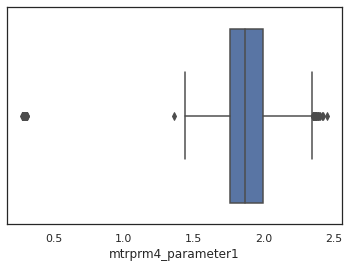

In [0]:
import seaborn as sns
sns.boxplot(x=df3['mtrprm4_parameter1'])

The Interquartile range is the middle 50% of the data.

In [0]:
IQR

mtrprm2_parameter1      0.009000
mtrprm2_parameter3      1.200000
mtrprm2_parameter4      1.101000
mtrprm3_parameter1      9.529000
mtrprm3_parameter5      8.408000
mtrprm4_parameter1      0.236000
mtrprm6_parameter1      0.296960
mtrprm8_parameter1      0.346000
mtrprm8_parameter2      0.062000
mtrprm9_parameter1      0.016700
mtrprm9_parameter2      0.009990
mtrprm9_parameter3      0.022900
mtrprm9_parameter4      0.000000
mtrprm11_parameter1     0.845900
mtrprm12_parameter1     2.049100
mtrprm13_parameter1     0.000000
mtrprm15_parameter1     6.962550
mtrprm17_parameter1     0.001000
mtrprm19_parameter1    28.691000
mtrprm20_parameter1     2.143000
mtrprm20_parameter2     2.151900
mtrprm21_parameter2     0.114075
mtrprm23_parameter2     0.000000
mtrprm24_parameter2     0.120170
mtrprm24_parameter3     0.141720
mtrprm24_parameter4     0.116410
hkpinp2_parameter1      0.000240
hkpinp3_parameter1      0.095000
hkpinp4_parameter1      0.000670
hkpinp4_parameter2      0.000660
hkpinp4_pa

In [0]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

df3 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3

,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18
1186070,0.024170,15.78,2.144,-9.527,35,8.403,1.700,0.63120,13.245,NaN,0.8544,0.02206,0.8655,NaN,8.7500,NaN,NaN,11.7700,0.000,187.191,8.4000,8.4100,9.08349,NaN,2.11770,2.14213,2.11831,0.02373,6.042,0.00788,0.076500,0.098180,0.167670,0.189250,0.258830,0.280540,0.349380,0.371060,0.44069,0.462340,0.531420,0.553110,0.622270,0.644000,0.713360,0.734920,0.803520
437375,0.024367,15.53,2.624,-9.530,31,8.409,1.620,0.72480,12.954,NaN,0.8385,0.01297,0.8255,NaN,7.5700,NaN,NaN,18.4800,0.000,181.149,8.3900,8.3900,8.94448,NaN,2.14291,2.16593,2.14167,0.02362,6.124,0.00842,0.076630,0.098130,0.167620,0.189420,0.258590,0.280240,0.349600,0.371210,0.44040,0.462020,0.531410,0.553110,0.622630,0.644390,0.713840,0.735480,0.804340
1244373,0.007000,12.50,0.519,0.000,6,0.000,2.235,0.53000,12.927,0.496,0.8331,0.00980,0.8472,0.0,6.3155,4.4727,0.0,19.5164,0.001,253.060,NaN,NaN,9.06600,0.0,1.99000,1.99000,1.99200,0.02334,6.176,0.00780,0.076490,0.097780,0.167080,0.188610,0.258860,0.280260,0.349230,0.370600,0.43991,0.461320,0.531390,0.552710,0.622060,0.643390,0.712870,0.734270,0.802930
1205832,0.017000,NaN,0.987,0.000,281,0.000,2.022,0.77300,12.994,0.436,0.8375,0.00500,0.8301,0.0,7.1072,2.5372,0.0,8.8953,0.001,228.290,6.3587,6.3540,8.85700,0.0,NaN,NaN,NaN,0.02348,6.102,0.00791,0.076370,0.097990,0.167210,0.188730,0.258110,0.279610,0.348740,0.370510,0.44001,0.461640,0.531010,0.552470,0.621940,0.643640,0.712970,0.734690,0.802860
130688,0.021094,14.81,1.359,-9.537,13,8.412,1.803,0.63936,13.307,NaN,0.8456,0.02259,0.8647,NaN,6.8700,NaN,NaN,6.7000,0.000,198.572,9.4900,9.5300,9.07736,NaN,2.17706,2.19453,2.17244,0.02335,6.129,0.00831,0.076700,0.097790,0.168030,0.189000,0.259480,0.280360,0.350250,0.371230,0.44078,0.461720,0.532280,0.553260,0.623270,0.644290,0.713840,0.734770,0.803960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483353,0.020313,14.71,1.234,-9.527,20,8.413,1.673,0.47616,13.152,NaN,0.8385,0.00717,0.8485,NaN,7.2400,NaN,NaN,7.4100,0.000,186.909,8.3900,8.3900,8.94884,NaN,2.13335,2.16596,2.13591,0.02327,6.030,0.00775,0.075850,0.097290,0.167100,0.188650,0.257900,0.279560,0.348920,0.370390,0.43994,0.461410,0.531260,0.552680,0.622190,0.643750,0.713270,0.734770,0.802990
1837570,0.008000,15.30,0.705,0.000,261,0.000,2.039,0.60200,12.674,0.440,0.8489,0.01370,0.8505,0.0,7.7239,2.9542,0.0,2.1695,0.001,232.300,NaN,NaN,8.94800,0.0,2.00200,2.01700,2.00500,0.02363,6.079,0.00835,0.076600,0.098130,0.167800,0.189250,0.258530,0.280160,0.349510,0.371250,0.44068,0.462170,0.531920,0.553420,0.622750,0.644380,0.714060,0.735510,0.803830
532660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02332,6.056,0.00801,0.076171,0.097626,0.167721,0.189395,0.258122,0.279567,0.349118,0.370603,0.44036,0.461893,0.531015,0.552633,0.622307,0.643731,0.713302,0.734843,0.803042
1042174,0.008000,15.10,0.387,0.000,361,0.000,1.778,0.52900,12.667,0.555,0.8478,0.00690,0.8558,0.0,7.8010,7.2464,0.0,3.8655,

Delete the parameter 7 column because its a categorical value.

Use a try/except because there's a value in the data that's not a number

In [0]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


pearsoncorr = imputedDF.corr(method='pearson')
pearsoncorr

,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18
mtrprm2_parameter1,1.000000,0.045327,0.400095,-6.471734e-01,-0.107613,6.471682e-01,-0.515149,-0.247197,0.017443,-1.644963e-02,0.333416,0.106065,0.051419,NaN,-0.000509,-3.503748e-03,NaN,-0.160054,-0.646136,-0.505014,0.542660,0.543533,0.066453,NaN,0.625094,0.625288,0.623922,0.017584,0.009917,-0.018782,-0.016954,-0.019175,-0.017829,-0.019038,-0.019408,-0.019952,-0.016661,-0.018777,-0.018403,-0.018871,-0.013812,-0.016381,-0.015318,-0.017272,-0.014893,-0.017884,-0.017136
mtrprm2_parameter3,0.045327,1.000000,0.045458,-7.598302e-02,-0.052009,7.596423e-02,-0.336966,-0.100361,0.035714,1.176646e-02,0.044032,0.027132,-0.008869,NaN,0.520909,-2.984621e-02,NaN,-0.014224,-0.075756,-0.341059,0.122099,0.120914,0.020840,NaN,0.068058,0.074155,0.067891,-0.032963,-0.008065,0.019364,0.028427,0.026128,0.027174,0.021793,0.029327,0.023817,0.024016,0.020296,0.027126,0.022015,0.023483,0.020929,0.028481,0.023393,0.025144,0.020451,0.027039
mtrprm2_parameter4,0.400095,0.045458,1.000000,-6.013559e-01,-0.081530,6.013584e-01,-0.450725,-0.190645,0.018193,-3.097819e-03,0.276530,0.090950,0.043671,NaN,-0.011835,8.002621e-03,NaN,-0.125346,-0.600671,-0.467250,0.511209,0.511509,0.099683,NaN,0.567338,0.567908,0.567137,-0.006068,0.000158,0.000926,0.002745,0.000661,0.002449,-0.001165,0.002655,0.000724,0.002205,-0.000813,0.001533,-0.000043,0.004391,0.002490,0.003821,0.000870,0.003449,0.000755,0.003114
mtrprm3_parameter1,-0.647173,-0.075983,-0.601356,1.000000e+00,0.168474,-9.999997e-01,0.730406,0.401353,-0.026323,-1.384165e-16,-0.462371,-0.141922,-0.060651,NaN,0.014097,4.297085e-16,NaN,0.241185,0.998416,0.761752,-0.852043,-0.852747,-0.155042,NaN,-0.936741,-0.940709,-0.936319,0.003008,-0.019330,-0.011109,-0.012912,-0.013408,-0.013527,-0.012652,-0.012875,-0.012493,-0.013510,-0.012069,-0.011335,-0.011024,-0.013481,-0.012601,-0.014546,-0.011911,-0.015323,-0.013810,-0.016151
mtrprm3_parameter4,-0.107613,-0.052009,-0.081530,1.684744e-01,1.000000,-1.684753e-01,0.139259,0.147086,0.003225,-6.983226e-02,-0.057360,-0.010888,0.021308,NaN,-0.014725,7.978409e-02,NaN,0.028987,0.168557,0.178014,-0.106284,-0.106666,-0.002296,NaN,-0.141023,-0.156468,-0.138555,-0.093924,-0.018446,0.049236,0.066144,0.053982,0.069715,0.047257,0.070719,0.049513,0.065291,0.050337,0.068481,0.050589,0.061139,0.055611,0.065984,0.053905,0.071080,0.052632,0.066736
mtrprm3_parameter5,0.647168,0.075964,0.601358,-9.999997e-01,-0.168475,1.000000e+00,-0.730398,-0.401351,0.026327,1.165652e-16,0.462346,0.141923,0.060644,NaN,-0.014122,1.273991e-15,NaN,-0.241182,-0.998416,-0.761750,0.852021,0.852726,0.155090,NaN,0.936725,0.940695,0.936302,-0.002990,0.019337,0.011106,0.012903,0.013404,0.013517,0.012646,0.012866,0.012488,0.013502,0.012065,0.011326,0.011020,0.013473,0.012596,0.014538,0.011907,0.015315,0.013805,0.016142
mtrprm4_parameter1,-0.515149,-0.336966,-0.450725,7.304061e-01,0.139259,-7.303985e-01,1.000000,0.272355,-0.033002,5.009133e-02,-0.361980,-0.110620,-0.054076,NaN,-0.219833,3.475049e-02,NaN,0.179135,0.729018,0.965139,-0.632033,-0.631960,-0.031733,NaN,-0.750684,-0.754568,-0.747710,-0.013026,-0.012797,0.008540,0.006384

In [0]:
from sklearn.impute import SimpleImputer
fill_NaN = SimpleImputer(missing_values=np.nan,strategy='mean')
imputedDF = pd.DataFrame(fill_NaN.fit_transform(df3))
imputedDF.columns = df3.columns
imputedDF.index = df3.index

In [0]:
imputedDF

,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18
1186070,0.024170,15.780000,2.144000,-9.527000,3.500000e+01,8.4030,1.7000,0.631200,13.245000,0.46694,0.854400,0.022060,0.865500,0.0,8.750000,6.113474,0.0,11.770000,0.000000,187.19100,8.400000,8.410000,9.083490,0.0,2.117700,2.142130,2.118310,0.02373,6.042,0.00788,0.076500,0.098180,0.167670,0.189250,0.258830,0.280540,0.349380,0.371060,0.44069,0.462340,0.531420,0.553110,0.622270,0.644000,0.713360,0.734920,0.803520
299924,0.009000,13.600000,1.199000,0.000000,1.810000e+11,0.0000,2.0740,0.721000,13.203000,0.42800,0.856100,0.018200,0.826800,0.0,6.935900,16.174300,0.0,16.623900,0.001000,235.90000,7.679245,7.683514,8.973000,0.0,2.018000,2.017000,2.025000,0.02346,6.104,0.00829,0.076690,0.098270,0.167760,0.189550,0.258400,0.279980,0.349510,0.371090,0.44041,0.461970,0.531760,0.553410,0.622760,0.644220,0.713580,0.735120,0.803760
535178,0.026000,13.800000,0.838000,0.000000,1.910000e+02,0.0000,1.9260,0.988000,14.425000,0.37000,0.827400,0.027300,0.826400,0.0,7.519600,11.974600,0.0,10.338900,0.001000,226.02000,6.269700,6.305900,8.886000,0.0,2.065889,2.082785,2.067652,0.02342,6.077,0.00793,0.076440,0.097860,0.167620,0.189170,0.258430,0.279850,0.349220,0.370740,0.44041,0.461810,0.531180,0.552530,0.622690,0.643970,0.713630,0.734870,0.803390
437375,0.024367,15.530000,2.624000,-9.530000,3.100000e+01,8.4090,1.6200,0.724800,12.954000,0.46694,0.838500,0.012970,0.825500,0.0,7.570000,6.113474,0.0,18.480000,0.000000,181.14900,8.390000,8.390000,8.944480,0.0,2.142910,2.165930,2.141670,0.02362,6.124,0.00842,0.076630,0.098130,0.167620,0.189420,0.258590,0.280240,0.349600,0.371210,0.44040,0.462020,0.531410,0.553110,0.622630,0.644390,0.713840,0.735480,0.804340
1244373,0.007000,12.500000,0.519000,0.000000,6.000000e+00,0.0000,2.2350,0.530000,12.927000,0.49600,0.833100,0.009800,0.847200,0.0,6.315500,4.472700,0.0,19.516400,0.001000,253.06000,7.679245,7.683514,9.066000,0.0,1.990000,1.990000,1.992000,0.02334,6.176,0.00780,0.076490,0.097780,0.167080,0.188610,0.258860,0.280260,0.349230,0.370600,0.43991,0.461320,0.531390,0.552710,0.622060,0.643390,0.712870,0.734270,0.802930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837570,0.008000,15.300000,0.705000,0.000000,2.610000e+02,0.0000,2.0390,0.602000,12.674000,0.44000,0.848900,0.013700,0.850500,0.0,7.723900,2.954200,0.0,2.169500,0.001000,232.30000,7.679245,7.683514,8.948000,0.0,2.002000,2.017000,2.005000,0.02363,6.079,0.00835,0.076600,0.098130,0.167800,0.189250,0.258530,0.280160,0.349510,0.371250,0.44068,0.462170,0.531920,0.553420,0.622750,0.644380,0.714060,0.735510,0.803830
532660,0.014346,14.459015,1.335517,-4.512565,7.811308e+09,3.9889,1.8779,0.639997,13.295479,0.46694,0.841226,0.013396,0.845337,0.0,7.199272,6.113474,0.0,9.260354,0.011025,210.68138,7.679245,7.683514,8.961863,0.0,2.065889,2.082785,2.067652,0.02332,6.056,0.00801,0.076171,0.097626,0.167721,0.189395,0.258122,0.279567,0.349118,0.370603,0.44036,0.461893,0.531015,0.552633,0.622307,0.643731,0.713302,0.734843,0.803042
10

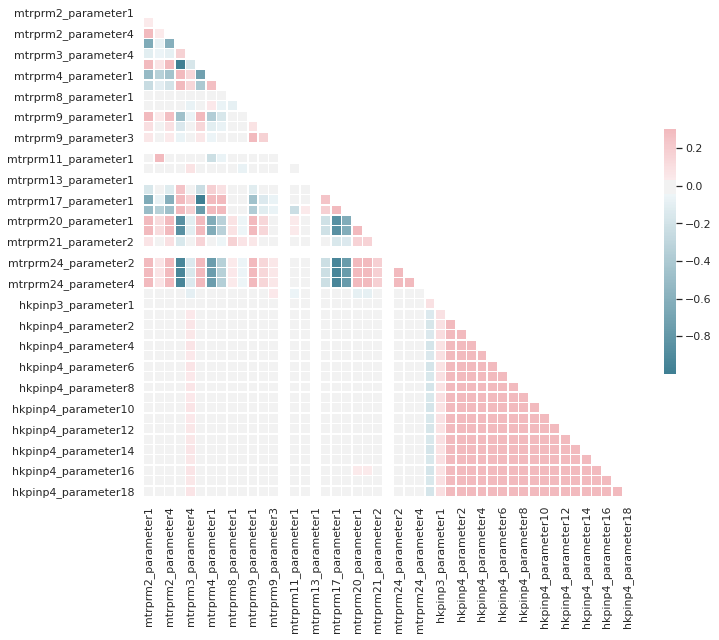

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

### correlation matrix and heatmap
sns.set(style="white")
corr = imputedDF.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Data processing part 2

Select the columns that don't contain the word parameter

In [0]:
df4 = df2.loc[:,~df2.columns.str.contains('parameter', case=False)]
df4

,Unnamed: 0,drive_serial_num,event_date,motor_serial_num,drive_interface,drive_part_number,drive_product_group,motor_vend_id,motor_lot,run_type,stack_serial_number,mtrprm_mfg_date_code,mtrprm_motor_line_num,mtrprm_ramp_date_code,mtrprm_ship_date,Target,DateDiff
1186070,1186071,ZL247EKX,2020-02-08,20A18P42803,SATA,2KH113-268,2KH113,P,100847724PCF4280H3U,NB,DDANC6ASY,4280.0,3.0,NaN,NaT,0,NaN
299924,299925,ZL20NP1V,2019-08-20,1034XZ40601,SATA,2KH113-268,2KH113,Z,100847723ZC54060K1U,NBP,DCHACRKJY,4060.0,1.0,K,2019-08-06,0,14.0
535178,535179,ZL2117BS,2019-09-20,17LR4Z51001,SATA,2KH113-268,2KH113,Z,100847723ZC55100K1U,NB,DCHSCF8HS,5100.0,1.0,K,2019-09-04,0,16.0
437375,437376,ZL23RWPK,2020-01-21,1VMSZP52601,SATA,2KH113-268,2KH113,P,100847724PCD5260H1U,NB,DCMUCDNVX,5260.0,1.0,NaN,NaT,0,NaN
1244373,1244374,ZL21D694,2019-10-13,19RYSZ11201,SATA,2KH113-268,2KH113,Z,100847723ZC51120K1U,NBP,DCJNCCN90,1120.0,1.0,K,2019-09-14,0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837570,1837571,ZL21R8V0,2019-10-31,1KCN6Z51501,SATA,2KH113-268,2KH113,Z,100847723ZC55150K1U,NBP,DCKBBZXNM,5150.0,1.0,K,2019-10-09,0,22.0
532660,532661,ZL219ZWT,2019-10-11,00CDYM44791,SATA,2KK103-002,2KK103,M,100851701MCD4479K1U,NBP,DCJNCBY0R,NaN,NaN,NaN,NaT,0,NaN
1042174,1042175,ZL23GQHN,2020-01-10,0HV9H332402,SATA,2KH113-268,2KH113,3,1008477233C53240H2U,NBP,DCMCC15EJ,3240.0,2.0,H,2019-12-09,0,32.0
150981,150982,ZL23HX07,2020-01-11,1Z3BGZ52301,SATA,2KH113-268,2KH113,Z,100847723ZC55230H1U,NBP,DCMDC1QJB,5230.0,1.0,H,2019-12-04,0,38.0


Merge the two dataframes together on the index (Imputed DF, and then DF4)

In [0]:
merged_DF = pd.merge(df4, imputedDF, left_index=True, right_index=True)
merged_DF

,Unnamed: 0,drive_serial_num,event_date,motor_serial_num,drive_interface,drive_part_number,drive_product_group,motor_vend_id,motor_lot,run_type,stack_serial_number,mtrprm_mfg_date_code,mtrprm_motor_line_num,mtrprm_ramp_date_code,mtrprm_ship_date,Target,DateDiff,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18
1186070,1186071,ZL247EKX,2020-02-08,20A18P42803,SATA,2KH113-268,2KH113,P,100847724PCF4280H3U,NB,DDANC6ASY,4280.0,3.0,NaN,NaT,0,NaN,0.024170,15.780000,2.144000,-9.527000,3.500000e+01,8.4030,1.7000,0.631200,13.245000,0.46694,0.854400,0.022060,0.865500,0.0,8.750000,6.113474,0.0,11.770000,0.000000,187.19100,8.400000,8.410000,9.083490,0.0,2.117700,2.142130,2.118310,0.02373,6.042,0.00788,0.076500,0.098180,0.167670,0.189250,0.258830,0.280540,0.349380,0.371060,0.44069,0.462340,0.531420,0.553110,0.622270,0.644000,0.713360,0.734920,0.803520
299924,299925,ZL20NP1V,2019-08-20,1034XZ40601,SATA,2KH113-268,2KH113,Z,100847723ZC54060K1U,NBP,DCHACRKJY,4060.0,1.0,K,2019-08-06,0,14.0,0.009000,13.600000,1.199000,0.000000,1.810000e+11,0.0000,2.0740,0.721000,13.203000,0.42800,0.856100,0.018200,0.826800,0.0,6.935900,16.174300,0.0,16.623900,0.001000,235.90000,7.679245,7.683514,8.973000,0.0,2.018000,2.017000,2.025000,0.02346,6.104,0.00829,0.076690,0.098270,0.167760,0.189550,0.258400,0.279980,0.349510,0.371090,0.44041,0.461970,0.531760,0.553410,0.622760,0.644220,0.713580,0.735120,0.803760
535178,535179,ZL2117BS,2019-09-20,17LR4Z51001,SATA,2KH113-268,2KH113,Z,100847723ZC55100K1U,NB,DCHSCF8HS,5100.0,1.0,K,2019-09-04,0,16.0,0.026000,13.800000,0.838000,0.000000,1.910000e+02,0.0000,1.9260,0.988000,14.425000,0.37000,0.827400,0.027300,0.826400,0.0,7.519600,11.974600,0.0,10.338900,0.001000,226.02000,6.269700,6.305900,8.886000,0.0,2.065889,2.082785,2.067652,0.02342,6.077,0.00793,0.076440,0.097860,0.167620,0.189170,0.258430,0.279850,0.349220,0.370740,0.44041,0.461810,0.531180,0.552530,0.622690,0.643970,0.713630,0.734870,0.803390
437375,437376,ZL23RWPK,2020-01-21,1VMSZP52601,SATA,2KH113-268,2KH113,P,100847724PCD5260H1U,NB,DCMUCDNVX,5260.0,1.0,NaN,NaT,0,NaN,0.024367,15.530000,2.624000,-9.530000,3.100000e+01,8.4090,1.6200,0.724800,12.954000,0.46694,0.838500,0.012970,0.825500,0.0,7.570000,6.113474,0.0,18.480000,0.000000,181.14900,8.390000,8.390000,8.944480,0.0,2.142910,2.165930,2.141670,0.02362,6.124,0.00842,0.076630,0.098130,0.167620,0.189420,0.258590,0.280240,0.349600,0.371210,0.44040,0.462020,0.531410,0.553110,0.622630,0.644390,0.713840,0.735480,0.804340
1244373,1244374,ZL21D694,2019-10-13,19RYSZ11201,SATA,2KH113-268,2KH113,Z,100847723ZC51120K1U,NBP,DCJNCCN90,1120.0,1.0,K,2019-09-14,0,29.0,0.007000,12.500000,0.519000,0.000000,6.000000e+00,0.0000,2.2350,0.530000,12.927000,0.49600,0.833100,0.009800,0.847200,0.0,6.315500,4.472700,0.0,19.516400,0.001000,253.06000,7.679245,7.683514,9.066000,0.0,1.990000,1.990000,1.992000,0.02334,6.176,0.00780,0.076490,0.097780,0.167080,0.188610,0.258860,0.280260,0.349230,0.370600,0.43991,0.461320,0.531390,0.552710,0.622060,0.643390,0.712870,0.734270,0.802930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [0]:
df = merged_DF
df

,Unnamed: 0,drive_serial_num,event_date,motor_serial_num,drive_interface,drive_part_number,drive_product_group,motor_vend_id,motor_lot,run_type,stack_serial_number,mtrprm_mfg_date_code,mtrprm_motor_line_num,mtrprm_ramp_date_code,mtrprm_ship_date,Target,DateDiff,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18
1186070,1186071,ZL247EKX,2020-02-08,20A18P42803,SATA,2KH113-268,2KH113,P,100847724PCF4280H3U,NB,DDANC6ASY,4280.0,3.0,NaN,NaT,0,NaN,0.024170,15.780000,2.144000,-9.527000,3.500000e+01,8.4030,1.7000,0.631200,13.245000,0.46694,0.854400,0.022060,0.865500,0.0,8.750000,6.113474,0.0,11.770000,0.000000,187.19100,8.400000,8.410000,9.083490,0.0,2.117700,2.142130,2.118310,0.02373,6.042,0.00788,0.076500,0.098180,0.167670,0.189250,0.258830,0.280540,0.349380,0.371060,0.44069,0.462340,0.531420,0.553110,0.622270,0.644000,0.713360,0.734920,0.803520
299924,299925,ZL20NP1V,2019-08-20,1034XZ40601,SATA,2KH113-268,2KH113,Z,100847723ZC54060K1U,NBP,DCHACRKJY,4060.0,1.0,K,2019-08-06,0,14.0,0.009000,13.600000,1.199000,0.000000,1.810000e+11,0.0000,2.0740,0.721000,13.203000,0.42800,0.856100,0.018200,0.826800,0.0,6.935900,16.174300,0.0,16.623900,0.001000,235.90000,7.679245,7.683514,8.973000,0.0,2.018000,2.017000,2.025000,0.02346,6.104,0.00829,0.076690,0.098270,0.167760,0.189550,0.258400,0.279980,0.349510,0.371090,0.44041,0.461970,0.531760,0.553410,0.622760,0.644220,0.713580,0.735120,0.803760
535178,535179,ZL2117BS,2019-09-20,17LR4Z51001,SATA,2KH113-268,2KH113,Z,100847723ZC55100K1U,NB,DCHSCF8HS,5100.0,1.0,K,2019-09-04,0,16.0,0.026000,13.800000,0.838000,0.000000,1.910000e+02,0.0000,1.9260,0.988000,14.425000,0.37000,0.827400,0.027300,0.826400,0.0,7.519600,11.974600,0.0,10.338900,0.001000,226.02000,6.269700,6.305900,8.886000,0.0,2.065889,2.082785,2.067652,0.02342,6.077,0.00793,0.076440,0.097860,0.167620,0.189170,0.258430,0.279850,0.349220,0.370740,0.44041,0.461810,0.531180,0.552530,0.622690,0.643970,0.713630,0.734870,0.803390
437375,437376,ZL23RWPK,2020-01-21,1VMSZP52601,SATA,2KH113-268,2KH113,P,100847724PCD5260H1U,NB,DCMUCDNVX,5260.0,1.0,NaN,NaT,0,NaN,0.024367,15.530000,2.624000,-9.530000,3.100000e+01,8.4090,1.6200,0.724800,12.954000,0.46694,0.838500,0.012970,0.825500,0.0,7.570000,6.113474,0.0,18.480000,0.000000,181.14900,8.390000,8.390000,8.944480,0.0,2.142910,2.165930,2.141670,0.02362,6.124,0.00842,0.076630,0.098130,0.167620,0.189420,0.258590,0.280240,0.349600,0.371210,0.44040,0.462020,0.531410,0.553110,0.622630,0.644390,0.713840,0.735480,0.804340
1244373,1244374,ZL21D694,2019-10-13,19RYSZ11201,SATA,2KH113-268,2KH113,Z,100847723ZC51120K1U,NBP,DCJNCCN90,1120.0,1.0,K,2019-09-14,0,29.0,0.007000,12.500000,0.519000,0.000000,6.000000e+00,0.0000,2.2350,0.530000,12.927000,0.49600,0.833100,0.009800,0.847200,0.0,6.315500,4.472700,0.0,19.516400,0.001000,253.06000,7.679245,7.683514,9.066000,0.0,1.990000,1.990000,1.992000,0.02334,6.176,0.00780,0.076490,0.097780,0.167080,0.188610,0.258860,0.280260,0.349230,0.370600,0.43991,0.461320,0.531390,0.552710,0.622060,0.643390,0.712870,0.734270,0.802930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [0]:
df.head()

,Unnamed: 0,drive_serial_num,event_date,motor_serial_num,drive_interface,drive_part_number,drive_product_group,motor_vend_id,motor_lot,run_type,stack_serial_number,mtrprm_mfg_date_code,mtrprm_motor_line_num,mtrprm_ramp_date_code,mtrprm_ship_date,Target,DateDiff,mtrprm2_parameter1,mtrprm2_parameter3,mtrprm2_parameter4,mtrprm3_parameter1,mtrprm3_parameter4,mtrprm3_parameter5,mtrprm4_parameter1,mtrprm6_parameter1,mtrprm8_parameter1,mtrprm8_parameter2,mtrprm9_parameter1,mtrprm9_parameter2,mtrprm9_parameter3,mtrprm9_parameter4,mtrprm11_parameter1,mtrprm12_parameter1,mtrprm13_parameter1,mtrprm15_parameter1,mtrprm17_parameter1,mtrprm19_parameter1,mtrprm20_parameter1,mtrprm20_parameter2,mtrprm21_parameter2,mtrprm23_parameter2,mtrprm24_parameter2,mtrprm24_parameter3,mtrprm24_parameter4,hkpinp2_parameter1,hkpinp3_parameter1,hkpinp4_parameter1,hkpinp4_parameter2,hkpinp4_parameter3,hkpinp4_parameter4,hkpinp4_parameter5,hkpinp4_parameter6,hkpinp4_parameter7,hkpinp4_parameter8,hkpinp4_parameter9,hkpinp4_parameter10,hkpinp4_parameter11,hkpinp4_parameter12,hkpinp4_parameter13,hkpinp4_parameter14,hkpinp4_parameter15,hkpinp4_parameter16,hkpinp4_parameter17,hkpinp4_parameter18,mtrprm3_parameter7
1186070,1186071,ZL247EKX,2020-02-08,20A18P42803,SATA,2KH113-268,2KH113,P,100847724PCF4280H3U,NB,DDANC6ASY,4280.0,3.0,NaN,NaT,0,NaN,0.024170,15.78,2.144,-9.527,3.500000e+01,8.403,1.700,0.6312,13.245,0.46694,0.8544,0.02206,0.8655,0.0,8.7500,6.113474,0.0,11.7700,0.000,187.191,8.400000,8.410000,9.08349,0.0,2.117700,2.142130,2.118310,0.02373,6.042,0.00788,0.07650,0.09818,0.16767,0.18925,0.25883,0.28054,0.34938,0.37106,0.44069,0.46234,0.53142,0.55311,0.62227,0.64400,0.71336,0.73492,0.80352,143519122440702
299924,299925,ZL20NP1V,2019-08-20,1034XZ40601,SATA,2KH113-268,2KH113,Z,100847723ZC54060K1U,NBP,DCHACRKJY,4060.0,1.0,K,2019-08-06,0,14.0,0.009000,13.60,1.199,0.000,1.810000e+11,0.000,2.074,0.7210,13.203,0.42800,0.8561,0.01820,0.8268,0.0,6.9359,16.174300,0.0,16.6239,0.001,235.900,7.679245,7.683514,8.97300,0.0,2.018000,2.017000,2.025000,0.02346,6.104,0.00829,0.07669,0.09827,0.16776,0.18955,0.25840,0.27998,0.34951,0.37109,0.44041,0.46197,0.53176,0.55341,0.62276,0.64422,0.71358,0.73512,0.80376,4990.71807382
535178,535179,ZL2117BS,2019-09-20,17LR4Z51001,SATA,2KH113-268,2KH113,Z,100847723ZC55100K1U,NB,DCHSCF8HS,5100.0,1.0,K,2019-09-04,0,16.0,0.026000,13.80,0.838,0.000,1.910000e+02,0.000,1.926,0.9880,14.425,0.37000,0.8274,0.02730,0.8264,0.0,7.5196,11.974600,0.0,10.3389,0.001,226.020,6.269700,6.305900,8.88600,0.0,2.065889,2.082785,2.067652,0.02342,6.077,0.00793,0.07644,0.09786,0.16762,0.18917,0.25843,0.27985,0.34922,0.37074,0.44041,0.46181,0.53118,0.55253,0.62269,0.64397,0.71363,0.73487,0.80339,209082301305
437375,437376,ZL23RWPK,2020-01-21,1VMSZP52601,SATA,2KH113-268,2KH113,P,100847724PCD5260H1U,NB,DCMUCDNVX,5260.0,1.0,NaN,NaT,0,NaN,0.024367,15.53,2.624,-9.530,3.100000e+01,8.409,1.620,0.7248,12.954,0.46694,0.8385,0.01297,0.8255,0.0,7.5700,6.113474,0.0,18.4800,0.000,181.149,8.390000,8.390000,8.94448,0.0,2.142910,2.165930,2.141670,0.02362,6.124,0.00842,0.07663,0.09813,0.16762,0.18942,0.25859,0.28024,0.34960,0.37121,0.44040,0.46202,0.53141,0.55311,0.62263,0.64439,0.71384,0.73548,0.80434,993119121530014
1244373,1244374,ZL21D694,2019-10-13,19RYSZ11201,SATA,2KH113-268,2KH113,Z,100847723ZC51120K1U,NBP,DCJNCCN90,1120.0,1.0,K,2019-09-14,0,29.0,0.007000,12.50,0.519,0.000,6.000000e+00,0.000,2.235,0.5300,12.927,0.49600,0.8331,0.00980,0.8472,0.0,6.3155,4.472700,0.0,19.5164,0.001,253.060,7.679245,7.683514,9.06600,0.0,1.990000,1.990000,1.992000,0.02334,6.176,0.00780,0.07649,0.09778,0.16708,0.18861,0.25886,0.28026,0.34923,0.37060,0.43991,0.46132,0.53139,0.55271,0.62206,0.64339,0.71287,0.73427,0.80293,230410115308


Add the removed column mtrprm3_parameter7 from df2 back to original df

In [0]:
df['mtrprm3_parameter7'] = df2['mtrprm3_parameter7']

In [0]:
df['drive_serial_num'].isnull().sum()

0

In [0]:
(df['mtrprm_ramp_date_code'].isnull().sum())/len(df)

0.49073412600174

In [0]:
df['hkpinp4_parameter16'].isnull().sum()
df['hkpinp4_parameter17'].isnull().sum()
df['hkpinp4_parameter18'].isnull().sum()

0

In [0]:
df['hkpinp4_parameter17'].isnull().sum()

0

In [0]:
df['hkpinp4_parameter18'].isnull().sum()

0

1. Talk to Katie about the number of the NA's in the categorical column and whether we need to remove or not.

In [0]:
df.to_csv(index=False)

In [0]:
df.to_csv(r'/content/drive/My Drive/Colab Notebooks/Seagate Project/Seagate(imputed).csv', index=False)

In [0]:
len(df['drive_serial_num'].unique())

Why did we delete these again?

In [0]:
del df['DateDiff']
del df['mtrprm_ship_date']
del df['mtrprm_mfg_date_code']
del df['mtrprm_motor_line_num']
del df['mtrprm_ramp_date_code']
del df['event_date']

In [0]:
del df['drive_serial_num']
del df['stack_serial_number']
del df['motor_serial_num']

In [0]:
del df['Unnamed: 0']

In [0]:
df.head()

In [0]:
drive_interface_label = df['drive_interface'].astype('category').cat.categories.tolist()
replace_interface= {'drive_interface' : {k: v for k,v in zip(drive_interface_label,list(range(1,len(drive_interface_label)+1)))}}
print(replace_interface)
df.replace(replace_interface, inplace=True)

In [0]:
motor_vend_id_label = df['motor_vend_id'].astype('category').cat.categories.tolist()
replace_motor_vend_id = {'motor_vend_id' : {k: v for k,v in zip(motor_vend_id_label,list(range(1,len(motor_vend_id_label)+1)))}}
print(replace_motor_vend_id)
df.replace(replace_motor_vend_id, inplace=True)

In [0]:
motor_lot_label = df['motor_lot'].astype('category').cat.categories.tolist()
replace_motor_lot = {'motor_lot' : {k: v for k,v in zip(motor_lot_label,list(range(1,len(motor_lot_label)+1)))}}
print(replace_motor_lot)
df.replace(replace_motor_lot, inplace=True)

In [0]:
drive_product_group = df['drive_product_group'].astype('category').cat.categories.tolist()
replace_productgroup= {'drive_product_group' : {k: v for k,v in zip(drive_product_group,list(range(1,len(drive_product_group)+1)))}}
print(replace_productgroup)
df.replace(replace_productgroup, inplace=True)

In [0]:
drive_part_number = df['drive_part_number'].astype('category').cat.categories.tolist()
replace_dpn= {'drive_part_number' : {k: v for k,v in zip(drive_part_number,list(range(1,len(drive_part_number)+1)))}}
print(replace_dpn)
df.replace(replace_dpn, inplace=True)

In [0]:
run_type = df['run_type'].astype('category').cat.categories.tolist()
replace_runtype= {'run_type' : {k: v for k,v in zip(run_type,list(range(1,len(run_type)+1)))}}
print(replace_runtype)
df.replace(replace_runtype, inplace=True)

In [0]:
df.head()

In [0]:
df['drive_interface'] = df['drive_interface'].astype('category')
df['drive_part_number'] = df['drive_part_number'].astype('category')
df['drive_product_group'] = df['drive_product_group'].astype('category')
df['motor_vend_id'] = df['motor_vend_id'].astype('category')
df['motor_lot'] = df['motor_lot'].astype('category')
df['run_type'] = df['run_type'].astype('category')

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
from IPython.display import Image  
from pydotplus import graph_from_dot_data

In [0]:
# Randomly, split the data into test/training/validation sets
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print (train.shape, test.shape, validate.shape)

In [0]:
# Separate target and predictors
y_train = train['Target']
x_train = train.drop(['Target'], axis=1)
y_test = test['Target']
x_test = test.drop(['Target'], axis=1)
y_validate = validate['Target']
x_validate = validate.drop(['Target'], axis=1)

# Check the balance of the splits on y_

In [0]:
# Variable importance
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))

In [0]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))

In [0]:
df.head()

In [0]:
# Instantiate
rf = RandomForestClassifier()	   
# Fit
rf_model = rf.fit(x_train, y_train)
# training accuracy 99.74%
rf_model.score(x_train, y_train)
# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)     
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)

In [0]:
rf_confus_matrix